# HW1 - Python and Probability

In this module, we will be using what you learned in class about python and probability and practice using the git workflow to submit assignments in this class. 

If there are aspects of python that you are rusty on, you can find a quick refresher at the following [location](https://github.com/dsahduke/Jupyter_notebooks_python). You can clone the repository by issuing the following command:

```
git clone https://github.com/dsahduke/Jupyter_notebooks_python.git
```

-----------

# INSTRUCTIONS - READ CAREFULLY 

For the following assignment, you must complete the questions as follows:

1. Begin by completing **2** questions by entering your answers below and then push the results to your version of the repository. You can choose to do this in as many commits as you would like.

2. Once 2 of the questions have been completed, **Do NOT make further commits to the master branch directly**. Instead, 

#### Create a new issue in github by going to the repository and clicking the issues tab and the new issue button
<div>
<img src="./assets/issues_button.png" width="250"/>
</div>
<br>
</br>
<div>
<img src="./assets/new_issue_highlight.png" width="300"/>
</div> 
 
#### Title your new issue "Complete Question X" where X is the number of the question that you have not yet completed and click "Submit New Issue"

#### In your local repository (on your computer), create a new branch with the following format:
`git checkout -b <YOUR-NETID>/complete-question-x/1` where you replace `<YOUR-NETID>` with your netID and `x` with the question you have yet to complete. You can now see that you should be on a different branch by typing `git branch -av`

#### Complete the assignment by editing the jupyter notebook and push your results up to the remote repository
`git push --set-upstream origin <YOUR-NETID>/complete-question-x/1`

Here, the `--set-upstream` flag tells git to make sure the new branch that you created locally is now associated with a branch on the remote repository (otherwise there is no way to know that you created a branch locally).

#### Now, go to your remote repository and create a pull request. 
> You can either do this by clicking the automatically created button called "compare and pull request"
<div>
<img src="./assets/autogen_pr.png" width=700/>
</div>
or manually through the Create Pull Request button on the Pull Requests Tab
<div>
<img src="./assets/new_pull_request.png" width=150/>
</div>

Once you have done this, make sure the top of the bar says:
<div>
<img src="./assets/comparison.png" width=800/>
</div>

where `test_branch` is your branch.

Create the pull request.

Normally, if you were working in a team, this is where you would review the contents of the proposed changes. Since this is an individual assignment, you can complete the PR (pull request) and click merge pull request. You should now see that your changes have been merged to the master branch. You may close the issue in github as well if you wish.

Successful completion of the github portion of this assignment is worth 25 points. 


--------------

# Probability and Python Exercises

In [416]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import math
%matplotlib inline
import string

### 1. Create a list of 1000 normally-distributed numbers with mean 10 and variance 5 and assign it to a variable

$$ X \sim N(10, 5) $$

For this, you can use the `scipy.stats.norm` function. You can find the documentation [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html). Look for the example that tells you how to generate random numbers!

Also, be careful about your `scale` parameter -- remember, you want a *variance* of 5 here. Another thing to watch out here is that we've imported the entire `scipy.stats` module. Keep that in mind when trying to figure out how to access functions within a module.

##### [10] pts

In [417]:
## Your code here:
norm_list = np.random.normal(10,5,1000)
print(norm_list)

[13.52116981  4.07879836  5.24974975 11.97380277 13.98507873  7.19802365
 -1.67250972  6.67342108  5.6235829   8.07716487 13.89315864  7.68245997
  2.42376545  8.5772115   9.1143038  11.16084775 20.16871391 11.66025024
  0.65992551  5.45031157  4.26933629 18.95166237  8.41584186 10.04258057
 22.98525805 16.54084278  4.61093363 16.86126643 19.73549833  2.60218128
  8.57758786 13.25135016 15.43190377  4.62448844 15.37228354  4.8392926
 18.12706612  8.5582558   3.45192302  7.4282218   2.86577095  9.04651933
  9.16507298 17.15981299  6.40585527 16.49280553  7.76619673  9.28415694
 15.30517732 11.930801    5.83340297  6.70729927  6.74881046 12.46979995
  1.55411921  8.04856337 19.58647369 13.11183493  6.74514621  5.10423429
  2.46507437  2.1868659  13.83877273  3.76346226  5.76212831  5.44941112
 14.85745102  3.90422485  7.57044672  8.09726572  0.773829   11.1918481
  6.25504295 14.80701968 15.96133658  3.44993186 18.69095851  6.33172359
 20.60451366  5.23937419  9.04044939 15.38703779  7.4

### Check the *empirical* mean and variance of this distribution by using the `mean` and `std` functions from the `numpy` library on your list.

##### [5] pts

In [418]:
## Mean:
print(np.mean(norm_list))

9.835491981187772


In [419]:
## Variance:
print(np.std(norm_list))

5.239436297562938


### 2. The Multivariate Normal

For this step, we're going to emulate draws from a bivariate normal distribution (a 2-dimensional normal distribution). As you remember from class, the multivariate normal distribution can be expressed by a mean vector and a covariance matrix. However, we can also build our *own* bivariate normal by generating correlated values to the values that you generated above.

The random normal values that you generated before were distributed

$$X \sim N(10, 5)$$ 
(This notation means the random variable X is distributed Normally with mean 10, and variance 5)

Let's say that we want to generate another set of 1000 Normal random variables. However, we want them to be *correlated* with your current list. At the end, we would like the *joint* distribution of the two lists to have some non-zero *covariance*. To read more about the difference between a correlation and a covariance, click [here](http://ci.columbia.edu/ci/premba_test/c0331/s7/s7_5.html)

At the end, we would like the *joint* distribution of the two lists to follow the following:

$$ \begin{bmatrix}X\\Y\end{bmatrix} \sim N(\begin{bmatrix}10 \\50 \end{bmatrix}, \begin{bmatrix}  5&8\\8&20\end{bmatrix})$$

which follows the following structure:

$$ \begin{bmatrix}X\\Y\end{bmatrix} \sim N(\begin{bmatrix} \mu_x \\ \mu_y \end{bmatrix}, \begin{bmatrix} \sigma_x^2 & \rho\sigma_x\sigma_y \\ \rho\sigma_y\sigma_x & \sigma_y^2 \end{bmatrix})$$

The diagonals of the covariance matrix are the respective variances of the two normal distributions that make up the bivariate normal. The diagonal elements represent the covariance between the two (this generalizes in *k* dimensions).

The covariance in this case is 8. However, we will need to convert this to a correlation for later. The relationship between the covariance and the correlation is given as follows:

$$ Cov_{xy} = \rho_{xy}\sigma_x\sigma_y $$

where $\rho_{xy}$ is the correlation between $x$ and $y$

##### [5] pts

In [420]:
# Compute the correlation between X and Y in the 
# multivariate normal distribution above and print it here:
cor_xy = 8/(np.sqrt(5)*np.sqrt(20))
cor_xy

0.7999999999999998

We now want to generate a new set of 1000 normally distributed variables. However, we want to generate them based on the values of our old list. For each number $x$ generated in your old list, generate a new number which is drawn from the following distribution:

$$ y \sim N((\mu_y + \rho(\frac{\sigma_y}{\sigma_x})(x-\mu_x)), \sigma^2_y (1-\rho^2)) $$

where $\rho$ is the *correlation* between the two normal distributions that you calculated above, $\mu_y$ is the mean of Y, and $\sigma$ represents the standard deviation. Store the results in another list of 1000 numbers. We will do this in two different ways: Please complete the boilerplate code below

#### Method 1 -- build a list iteratively [10 pts]

In [421]:
## This first method will involve constructing 
## an array iteratively using a for loop:

cond_normal_array1 = []
for v in norm_list:
    """
    Compute a new number depending on the value in normlist
    and append it to cond_normal_array1
    """
    # Your code here
    mu_y = 1.6*v+34
    y = np.random.normal(mu_y,7.2,1)
    cond_normal_array1.append(y)
    

Verify that the mean and variance of the numbers that you generated match the expected distribution of $Y$

In [422]:
# Find the mean 
print(np.mean(cond_normal_array1))

50.01795532655801


In [423]:
# And variance
print(np.std(cond_normal_array1))

11.426382331620422


#### Method 2 - List Comprehension [10 pts]

This method will involve writing a function that operates on a single value, and then we will apply that in a list comprehension to generate the new list


In [424]:
def gen_cond_normal_val(x, y_mean, x_mean, y_std, x_std, rho):
    cond_norm_array2 = stats.norm.rvs(loc=y_mean+rho*(y_std/x_std)*(x-x_mean),scale=math.sqrt(y_std**2*(1-rho**2)),size=1)
    """
    This function returns a draw from a conditional normal distribution with the specified parameters
    Args: (all Args numeric)
        x: Observed value
        y_mean: mean of Y distribution
        x_mean: mean of X distribution
        y_std: standard deviation of Y distribution
        x_std: standard deviation of X distribution
        rho: correlation between X and Y
    Returns: 
        
    """
    return cond_norm_array2

In [425]:
cond_normal_array2 = [gen_cond_normal_val(x, 50, 10, np.sqrt(20), np.sqrt(5), 0.8) for x in norm_list] # replace the ... with your parameter values

In [426]:
print(np.mean(cond_normal_array2))
print(np.std(cond_normal_array2))

49.657261896313564
8.844718596805931


### 3. Strings and Discrete Distributions

In this section, we will use strings and dictionaries to create a draw from a discrete distribution. 

First, take the following string and perform the following operations and save it back to the same variable:

 1. Remove all whitespace (spaces)
 2. Remove all periods `.` and commas `,`
 3. Make every letter lowercase
 

##### [5] pts

In [427]:
lorem_string = "Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum."

In [428]:
# Perform the operations listed above and save it back to lorem_string
lorem_string = lorem_string.replace(' ','')
exclude = set(string.punctuation)
lorem_string = ''.join(ch for ch in lorem_string if ch not in exclude)
lorem_string = lorem_string.lower()
lorem_string

'loremipsumdolorsitametconsecteturadipiscingelitseddoeiusmodtemporincididuntutlaboreetdoloremagnaaliquautenimadminimveniamquisnostrudexercitationullamcolaborisnisiutaliquipexeacommodoconsequatduisauteiruredolorinreprehenderitinvoluptatevelitessecillumdoloreeufugiatnullapariaturexcepteursintoccaecatcupidatatnonproidentsuntinculpaquiofficiadeseruntmollitanimidestlaborum'

Next, create a dictionary where the `keys` are each of the letters of the english alphabet and the `values` are the number of times it appears in the following string. Assign this to a variable called `result_dict`:

##### [10 pts]

In [429]:
# Your code here:
result_dict = {}
for keys in lorem_string:
    if keys in result_dict:
        count = result_dict[keys]
    else:
        count = 0  
    count = count + 1
    result_dict[keys] = count
print(result_dict)
print(result_dict.values())
print(result_dict.keys())

{'l': 22, 'o': 29, 'r': 22, 'e': 38, 'm': 17, 'i': 42, 'p': 11, 's': 18, 'u': 29, 'd': 19, 't': 32, 'a': 29, 'c': 16, 'n': 24, 'g': 3, 'b': 3, 'q': 5, 'v': 3, 'x': 3, 'h': 1, 'f': 3}
dict_values([22, 29, 22, 38, 17, 42, 11, 18, 29, 19, 32, 29, 16, 24, 3, 3, 5, 3, 3, 1, 3])
dict_keys(['l', 'o', 'r', 'e', 'm', 'i', 'p', 's', 'u', 'd', 't', 'a', 'c', 'n', 'g', 'b', 'q', 'v', 'x', 'h', 'f'])


if you did everything correctly, this should output a plot!

<BarContainer object of 21 artists>

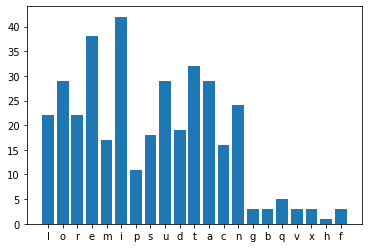

In [430]:
# Run this line to plot the counts
plt.bar(list(result_dict.keys()), list(result_dict.values()))

Next, we're going to create a discrete distribution from what you saw in `result_dict`. We will take the counts of values as you observed as defining the distribution. In order to make it look more like a distribution, we need to *normalize* the counts. Recall that probability distributions must sum up to 1. So, we need to make the values in `result_dict` sum up to 1, but to keep the ratio between each of the values. To do this, simply divide every element by the sum of all of the elements. Return this new dictionary as `normalized_dict`

##### [10] pts

{'l': 0.05962059620596206, 'o': 0.07859078590785908, 'r': 0.05962059620596206, 'e': 0.10298102981029811, 'm': 0.04607046070460705, 'i': 0.11382113821138211, 'p': 0.02981029810298103, 's': 0.04878048780487805, 'u': 0.07859078590785908, 'd': 0.051490514905149054, 't': 0.08672086720867209, 'a': 0.07859078590785908, 'c': 0.04336043360433604, 'n': 0.06504065040650406, 'g': 0.008130081300813007, 'b': 0.008130081300813007, 'q': 0.013550135501355014, 'v': 0.008130081300813007, 'x': 0.008130081300813007, 'h': 0.0027100271002710027, 'f': 0.008130081300813007}


<BarContainer object of 21 artists>

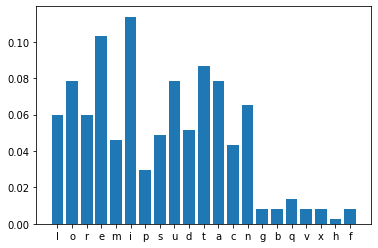

In [431]:
# Your code here
factor = 1.0/sum(result_dict.values())    
normalized_dict = {k: v*factor for k, v in result_dict.items()}
print(normalized_dict)
plt.bar(list(normalized_dict.keys()), list(normalized_dict.values()))

Next, recall that a Random Variable is a function that maps events from the sample space (here, this is the letters) to real numbers. We're going to define a random variable $X$ that takes on the values as defined by the following dictionary (any letter which does not show up in our `normalized_dict` you can ignore.

In [432]:
letter_dict = dict(zip(string.ascii_lowercase, range(1, len(string.ascii_lowercase)+1)))
letter_dict

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26}

Assume that the probabilities that you see in `normalized_dict` are the result of evaluating a probability mass function for drawing letters. Each of the letter draws is now represented by a number according to `letter_dict`. Using this information, compute the Expected Value of the distribution. In addition, write code the implements both forms of the variance formula below and verify that they are indeed equivalent.
$$ E(X) = \sum_ix_iP(x_i) $$
$$ Var(X) = \sum_i(x_i-E(X))^2P(x_i)$$
$$ or $$
$$Var(X)= E(X^2) - E(X)^2 $$

##### [10] pts 

In [433]:
# Expectation - Your code here
expectation1 = 0
for keys in normalized_dict:
    exp1 = normalized_dict[keys]*letter_dict[keys]
    expectation1 = expectation1 + exp1
expectation1

11.96747967479675

In [434]:
# Variance Equation # 1 - Your code here
variance1 = 0
for keys in normalized_dict:
    var1 = (letter_dict[keys]-expectation1)**2*normalized_dict[keys]
    variance1 = variance1 + var1
variance1

44.00436248264921

In [435]:
# Variance Equation # 2 - Your code here
expectation2 = 0
for keys in normalized_dict:
    exp2 = normalized_dict[keys]*(letter_dict[keys]**2)
    expectation2 = expectation2 + exp2
variance2 = expectation2 - expectation1**2
variance2

44.004362482649185